### Data visualization for deconvolution results for seq-based Spatial Transcriptomics datasets

Last updated: 10/03/2022
Author: Yang-Joon Kim

seq-based Spatial Transcriptomics datasets might require deconvolution to dissect the composition of cell-types from the minimal spatial measurement unit (termed Spots, beads, pixels, etc.). The result resembles the structure of count matrices, Cell x Gene, in fact, Spots x Cell-Types (normalized proportion of cell-types).

Thus, we can actually create this Spots x Cell-Types matrix purely for data visualization purposes. 
- adata.X : Spots x Cell-types
- adata.obs : Spots metadata
- adata.var : cell-type metadata (for example, classes of cell ontologies, T cells, B cells, etc.)
- adata.obsm["spatial"] : spatial coordinates. An array of tuples (x,y) coordinates.

Then, we can compute DE, where the cell-type proportions can be interpreted as if they were normalized counts for each "gene".

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
# import squidpy as sq
# import os


In [84]:
df_deconv = pd.read_csv("/mnt/ibm_lg/spatial-seq/SlideSeq/data/deconvolution/RCTD_TDR98_1dpf_slideseq_chromacode_zebrahubv4/results_df.csv",
                       index_col="Unnamed: 0")
df_deconv

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
TGCACCCGTTGCTC,doublet_certain,blood cell,muscle,False,False,1743.668836,1859.563990,True,True
CACGGCCGCTGTTA,doublet_certain,myoblast,lens,False,False,1151.665139,1244.724688,True,True
CCTGTTCGGCTGCT,doublet_certain,epidermal cell,myoblast,False,False,1351.593197,1465.519340,True,True
GACCACATGGGCTG,doublet_certain,pharyngeal arch,lens,False,False,1157.585200,1242.492494,True,True
AACTGGCAGCGTCC,doublet_certain,muscle,lens,False,False,1030.005624,1152.885651,True,True
...,...,...,...,...,...,...,...,...,...
GGTTCCACGTTCTT,singlet,muscle,lens,False,False,104.496569,126.520796,True,True
CCCACTTCGAACCC,reject,muscle,trunk,False,False,142.896716,192.896716,True,True
TTAGCGCGGTGGGA,singlet,muscle,blood cell,False,False,140.342402,162.768606,True,True
CGGACCGAGGAACT,singlet,lens,neuron,False,False,140.783851,144.448336,True,True


In [85]:
df_deconv[df_deconv["spot_class"]=="reject"]

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
TTGGATCGTATTGC,reject,central nervous system,muscle,False,False,933.640796,983.640796,True,True
AAGCTCGGAGTACG,reject,lens,myoblast,False,False,701.658643,751.658643,True,True
CACATCGTGGTACC,reject,muscle,myoblast,False,False,705.155692,755.155692,True,True
GACAGGGCCAACTT,reject,central nervous system,lens,False,False,818.946903,868.946903,True,True
CCCCCACGGGATTA,reject,myoblast,neutrophil,False,False,922.334507,972.334507,True,True
...,...,...,...,...,...,...,...,...,...
CTCCCGTGGCTGTG,reject,lens,muscle,False,False,90.711765,140.711765,True,True
CGCCCTATTGTCAG,reject,epidermal cell,lens,False,False,115.627601,165.627601,True,True
GCCTCTCCGTAGAG,reject,muscle,trunk,False,False,70.981075,120.981075,True,True
CCCACTTCGAACCC,reject,muscle,trunk,False,False,142.896716,192.896716,True,True


In [86]:
df_deconv[df_deconv["spot_class"]=="doublet_uncertain"]

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
ATGGCCTCACATTC,doublet_uncertain,lens,muscle,False,False,1030.470812,1125.475131,True,True
CCTGCCGATCCCTT,doublet_uncertain,central nervous system,muscle,False,False,964.142212,1021.324786,True,True
ATCCCGTATCACGT,doublet_uncertain,central nervous system,muscle,False,False,932.846195,990.601411,True,True
CAGTTACACTACTA,doublet_uncertain,lens,muscle,False,False,929.742400,987.137051,True,True
AACCCTACGAGATA,doublet_uncertain,lens,myoblast,False,False,984.627479,1087.426959,True,True
...,...,...,...,...,...,...,...,...,...
GGTTCGACGAAGCA,doublet_uncertain,muscle,cranial cartilage,False,False,112.139088,138.178084,True,True
GACAGATCCACTAC,doublet_uncertain,muscle,neuron,False,False,135.829292,163.679064,True,True
CCCCATTGGATGTA,doublet_uncertain,muscle,vasculature,False,False,136.585673,161.893041,True,True
TGACCTCCAGGAGG,doublet_uncertain,muscle,central nervous system,False,False,143.065631,181.263667,True,True


In [87]:
df_deconv[df_deconv["spot_class"]=="singlet"]

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
ACCCAAGAACACCA,singlet,neuron,lens,False,False,682.453808,707.408302,True,True
CACCCGAATTAAGG,singlet,myoblast,epidermal cell,False,False,671.881380,693.670171,True,True
AGTTTCTCCATCGA,singlet,central nervous system,lens,False,False,678.148713,702.424411,True,True
CTCTCACTAGACCC,singlet,myoblast,lens,False,False,549.895416,573.781703,True,True
TACTGTTCGCATGA,singlet,central nervous system,muscle,False,False,668.262514,690.644388,True,True
...,...,...,...,...,...,...,...,...,...
CTCTAAGTTCGAAG,singlet,lens,muscle,False,False,134.452487,144.392228,True,True
CTGCCCGAAAGCCG,singlet,lens,muscle,False,False,130.896472,148.240785,True,True
GGTTCCACGTTCTT,singlet,muscle,lens,False,False,104.496569,126.520796,True,True
TTAGCGCGGTGGGA,singlet,muscle,blood cell,False,False,140.342402,162.768606,True,True


### Read the result file from the Deconvolution

In [88]:
df_result = pd.read_csv("/mnt/ibm_lg/spatial-seq/SlideSeq/data/deconvolution/RCTD_TDR98_1dpf_slideseq_chromacode_zebrahubv4/RCTD_result.csv",
                        index_col="Unnamed: 0")
df_result

,blood cell,cardiac muscle,cartilage element,central nervous system,choroid plexus,cornea,cranial cartilage,dermal bone,enteric musculature,epidermal cell,...,otic vesicle,pancreas,pectoral fin,periderm,pharyngeal arch,pronephric duct,radial glial cell,retina,trunk,vasculature
TGCACCCGTTGCTC,3.863136e-01,0.006394,1.928462e-05,0.067542,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.512543e-03,...,0.000019,0.000019,1.928462e-05,1.928462e-05,1.928462e-05,9.803570e-03,1.928462e-05,9.820483e-03,2.966657e-02,4.196646e-02
CACGGCCGCTGTTA,1.120112e-01,0.006516,1.490424e-05,0.072603,1.673995e-02,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,4.007293e-02,...,0.001867,0.000015,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,9.732452e-03,1.812599e-01,1.490424e-05
CCTGTTCGGCTGCT,5.518826e-03,0.012319,2.343714e-05,0.000023,9.832715e-03,2.343714e-05,2.343714e-05,4.289000e-03,2.427445e-02,1.629501e-01,...,0.000023,0.000023,2.343714e-05,6.446340e-05,2.343714e-05,2.720987e-02,2.343714e-05,4.558877e-03,1.272116e-01,6.937614e-03
GACCACATGGGCTG,2.007483e-02,0.006211,5.198062e-05,0.071482,5.198062e-05,1.594505e-02,5.198062e-05,5.198062e-05,5.198062e-05,2.510290e-02,...,0.000052,0.000052,5.198062e-05,5.198062e-05,7.960225e-02,3.289446e-02,5.198062e-05,5.198062e-05,1.036299e-01,2.190059e-02
AACTGGCAGCGTCC,6.821490e-03,0.005719,8.712273e-06,0.091153,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,2.529765e-02,...,0.000009,0.000009,8.712272e-06,8.712272e-06,8.712272e-06,9.598633e-06,8.712272e-06,8.712272e-06,8.712272e-06,1.021427e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTTCCACGTTCTT,2.096524e-05,0.000021,2.096524e-05,0.041127,9.800949e-02,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,...,0.000021,0.000021,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096525e-05,2.096524e-05,2.096524e-05
CCCACTTCGAACCC,1.205196e-05,0.103410,1.205196e-05,0.000045,1.205196e-05,1.205196e-05,1.205196e-05,1.205196e-05,7.805179e-02,1.205196e-05,...,0.000012,0.000012,1.205196e-05,1.051189e-01,1.205196e-05,1.205196e-05,1.205196e-05,1.205196e-05,3.706321e-01,8.401865e-02
TTAGCGCGGTGGGA,2.142667e-01,0.000012,7.638658e-06,0.138234,7.638658e-06,7.638657e-06,7.395351e-02,7.638657e-06,7.638657e-06,7.638657e-06,...,0.000008,0.000008,7.638657e-06,5.545734e-02,7.638657e-06,2.226784e-01,7.638658e-06,7.638655e-06,7.638657e-06,7.638657e-06
CGGACCGAGGAACT,3.107321e-07,0.036790,3.107313e-07,0.000201,3.107318e-07,3.107315e-07,3.107316e-07,3.107313e-07,3.107312e-07,3.107316e-07,...,0.000013,0.000010,3.107313e-07,3.107308e-07,3.107312e-07,3.107314e-07,3.107305e-07,3.107312e-07,3.107312e-07,3.107306e-07


In [89]:
# check if the cell-type proportions are normalized
np.sum(df_result, axis=1)

TGCACCCGTTGCTC    1.0
CACGGCCGCTGTTA    1.0
CCTGTTCGGCTGCT    1.0
GACCACATGGGCTG    1.0
AACTGGCAGCGTCC    1.0
                 ... 
GGTTCCACGTTCTT    1.0
CCCACTTCGAACCC    1.0
TTAGCGCGGTGGGA    1.0
CGGACCGAGGAACT    1.0
TTACAGCCAGGATC    1.0
Length: 8053, dtype: float64

In [90]:
df_result.iloc[:,:]

,blood cell,cardiac muscle,cartilage element,central nervous system,choroid plexus,cornea,cranial cartilage,dermal bone,enteric musculature,epidermal cell,...,otic vesicle,pancreas,pectoral fin,periderm,pharyngeal arch,pronephric duct,radial glial cell,retina,trunk,vasculature
TGCACCCGTTGCTC,3.863136e-01,0.006394,1.928462e-05,0.067542,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.512543e-03,...,0.000019,0.000019,1.928462e-05,1.928462e-05,1.928462e-05,9.803570e-03,1.928462e-05,9.820483e-03,2.966657e-02,4.196646e-02
CACGGCCGCTGTTA,1.120112e-01,0.006516,1.490424e-05,0.072603,1.673995e-02,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,4.007293e-02,...,0.001867,0.000015,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,9.732452e-03,1.812599e-01,1.490424e-05
CCTGTTCGGCTGCT,5.518826e-03,0.012319,2.343714e-05,0.000023,9.832715e-03,2.343714e-05,2.343714e-05,4.289000e-03,2.427445e-02,1.629501e-01,...,0.000023,0.000023,2.343714e-05,6.446340e-05,2.343714e-05,2.720987e-02,2.343714e-05,4.558877e-03,1.272116e-01,6.937614e-03
GACCACATGGGCTG,2.007483e-02,0.006211,5.198062e-05,0.071482,5.198062e-05,1.594505e-02,5.198062e-05,5.198062e-05,5.198062e-05,2.510290e-02,...,0.000052,0.000052,5.198062e-05,5.198062e-05,7.960225e-02,3.289446e-02,5.198062e-05,5.198062e-05,1.036299e-01,2.190059e-02
AACTGGCAGCGTCC,6.821490e-03,0.005719,8.712273e-06,0.091153,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,2.529765e-02,...,0.000009,0.000009,8.712272e-06,8.712272e-06,8.712272e-06,9.598633e-06,8.712272e-06,8.712272e-06,8.712272e-06,1.021427e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTTCCACGTTCTT,2.096524e-05,0.000021,2.096524e-05,0.041127,9.800949e-02,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,...,0.000021,0.000021,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096525e-05,2.096524e-05,2.096524e-05
CCCACTTCGAACCC,1.205196e-05,0.103410,1.205196e-05,0.000045,1.205196e-05,1.205196e-05,1.205196e-05,1.205196e-05,7.805179e-02,1.205196e-05,...,0.000012,0.000012,1.205196e-05,1.051189e-01,1.205196e-05,1.205196e-05,1.205196e-05,1.205196e-05,3.706321e-01,8.401865e-02
TTAGCGCGGTGGGA,2.142667e-01,0.000012,7.638658e-06,0.138234,7.638658e-06,7.638657e-06,7.395351e-02,7.638657e-06,7.638657e-06,7.638657e-06,...,0.000008,0.000008,7.638657e-06,5.545734e-02,7.638657e-06,2.226784e-01,7.638658e-06,7.638655e-06,7.638657e-06,7.638657e-06
CGGACCGAGGAACT,3.107321e-07,0.036790,3.107313e-07,0.000201,3.107318e-07,3.107315e-07,3.107316e-07,3.107313e-07,3.107312e-07,3.107316e-07,...,0.000013,0.000010,3.107313e-07,3.107308e-07,3.107312e-07,3.107314e-07,3.107305e-07,3.107312e-07,3.107312e-07,3.107306e-07


In [91]:
np.shape(df_result.to_numpy())

(8053, 38)

In [92]:
df_result_filtered = df_result[df_deconv["spot_class"]!="reject"]
df_result_filtered

,blood cell,cardiac muscle,cartilage element,central nervous system,choroid plexus,cornea,cranial cartilage,dermal bone,enteric musculature,epidermal cell,...,otic vesicle,pancreas,pectoral fin,periderm,pharyngeal arch,pronephric duct,radial glial cell,retina,trunk,vasculature
TGCACCCGTTGCTC,3.863136e-01,0.006394,1.928462e-05,0.067542,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.928462e-05,1.512543e-03,...,0.000019,0.000019,1.928462e-05,1.928462e-05,1.928462e-05,9.803570e-03,1.928462e-05,9.820483e-03,2.966657e-02,4.196646e-02
CACGGCCGCTGTTA,1.120112e-01,0.006516,1.490424e-05,0.072603,1.673995e-02,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,4.007293e-02,...,0.001867,0.000015,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,1.490424e-05,9.732452e-03,1.812599e-01,1.490424e-05
CCTGTTCGGCTGCT,5.518826e-03,0.012319,2.343714e-05,0.000023,9.832715e-03,2.343714e-05,2.343714e-05,4.289000e-03,2.427445e-02,1.629501e-01,...,0.000023,0.000023,2.343714e-05,6.446340e-05,2.343714e-05,2.720987e-02,2.343714e-05,4.558877e-03,1.272116e-01,6.937614e-03
GACCACATGGGCTG,2.007483e-02,0.006211,5.198062e-05,0.071482,5.198062e-05,1.594505e-02,5.198062e-05,5.198062e-05,5.198062e-05,2.510290e-02,...,0.000052,0.000052,5.198062e-05,5.198062e-05,7.960225e-02,3.289446e-02,5.198062e-05,5.198062e-05,1.036299e-01,2.190059e-02
AACTGGCAGCGTCC,6.821490e-03,0.005719,8.712273e-06,0.091153,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,8.712272e-06,2.529765e-02,...,0.000009,0.000009,8.712272e-06,8.712272e-06,8.712272e-06,9.598633e-06,8.712272e-06,8.712272e-06,8.712272e-06,1.021427e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGTTTGAGGTTGC,4.125667e-06,0.000004,4.125667e-06,0.000004,4.125667e-06,4.125667e-06,4.125667e-06,4.125667e-06,4.125667e-06,4.101392e-02,...,0.000004,0.000004,4.125667e-06,4.125666e-06,4.125667e-06,4.125667e-06,4.125667e-06,4.125668e-06,1.646446e-01,4.125667e-06
CTGCCCGAAAGCCG,2.496065e-06,0.000002,2.496065e-06,0.000002,1.061919e-05,2.496065e-06,2.496065e-06,2.496065e-06,2.496065e-06,2.496065e-06,...,0.000018,0.000002,2.496065e-06,2.496066e-06,2.496065e-06,2.496065e-06,2.496065e-06,2.496065e-06,1.873025e-01,2.496065e-06
GGTTCCACGTTCTT,2.096524e-05,0.000021,2.096524e-05,0.041127,9.800949e-02,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,...,0.000021,0.000021,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096524e-05,2.096525e-05,2.096524e-05,2.096524e-05
TTAGCGCGGTGGGA,2.142667e-01,0.000012,7.638658e-06,0.138234,7.638658e-06,7.638657e-06,7.395351e-02,7.638657e-06,7.638657e-06,7.638657e-06,...,0.000008,0.000008,7.638657e-06,5.545734e-02,7.638657e-06,2.226784e-01,7.638658e-06,7.638655e-06,7.638657e-06,7.638657e-06


In [93]:
df_np_array = df_result_filtered.to_numpy()
df_np_array

# create an AnnData from the above dataframe
adata_deconv = ad.AnnData(X=df_np_array)
adata_deconv.obs_names = df_result_filtered.index
adata_deconv.var_names = df_result_filtered.columns
adata_deconv

AnnData object with n_obs × n_vars = 4532 × 38

In [99]:
df_np_array = df_result.to_numpy()
df_np_array

# create an AnnData from the above dataframe
adata_deconv = ad.AnnData(X=df_np_array)
adata_deconv.obs_names = df_result.index
adata_deconv.var_names = df_result.columns
adata_deconv

AnnData object with n_obs × n_vars = 8053 × 38

In [94]:
adata_deconv.var_names

Index(['blood cell', 'cardiac muscle', 'cartilage element',
       'central nervous system', 'choroid plexus', 'cornea',
       'cranial cartilage', 'dermal bone', 'enteric musculature',
       'epidermal cell', 'epithelial cell', 'fin', 'glial cell',
       'hematopoietic stem cell', 'integument ionocyte', 'intestine', 'lens',
       'liver', 'macrophage', 'median fin fold', 'mesoderm', 'muscle',
       'myoblast', 'myotome', 'neuromast', 'neuron', 'neutrophil', 'notochord',
       'otic vesicle', 'pancreas', 'pectoral fin', 'periderm',
       'pharyngeal arch', 'pronephric duct', 'radial glial cell', 'retina',
       'trunk', 'vasculature'],
      dtype='object')

In [95]:
# Load the original anndata for spatial coordinates
# Note that we should match the cell_id indices here
adata = sc.read_h5ad("/mnt/ibm_lg/spatial-seq/SlideSeq/data/annotated_data/Zebrafish_chromacode/slideseq_TDR98_1pdf_chromacode_min_counts_100_min_genes_50.h5ad")
adata

AnnData object with n_obs × n_vars = 8053 × 18454
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_spatial', 'spatial'
    layers: 'counts'

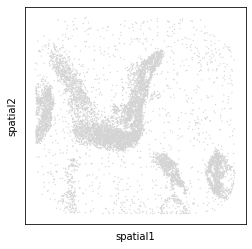

In [96]:
sc.pl.spatial(adata, spot_size=30)

In [100]:
# subset for the "beads" that are in the deconvolution object
adata_subset = adata[adata.obs.index.isin(adata_deconv.obs.index)]
adata_subset

adata_deconv = adata_deconv[adata_deconv.obs.index.isin(adata_subset.obs.index)]
adata_deconv

View of AnnData object with n_obs × n_vars = 8053 × 38

In [69]:
adata_subset.obs

,sample,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,n_genes,high_counts
AAAAACGGCGCTCA,TDR99_1dpf,1142,6138.0,51.0,0.830890,6138.0,1142,0
CACCAGACGAGCCG,TDR99_1dpf,1294,5438.0,79.0,1.452740,5438.0,1294,0
TTGACTGGGGGTGC,TDR99_1dpf,1102,5089.0,71.0,1.395166,5089.0,1102,0
AACACCACACATCG,TDR99_1dpf,1730,4958.0,83.0,1.674062,4958.0,1730,0
ATCCCGACACCGCC,TDR99_1dpf,949,4382.0,47.0,1.072570,4382.0,949,0
...,...,...,...,...,...,...,...,...
AATCACTGCTCGCA,TDR99_1dpf,59,127.0,0.0,0.000000,127.0,59,0
CCCTGTGGCATGAC,TDR99_1dpf,77,107.0,2.0,1.869159,107.0,77,0
CGCCCCCTTCAGAT,TDR99_1dpf,72,123.0,3.0,2.439024,123.0,72,0
AATCACCGCGCCGA,TDR99_1dpf,85,175.0,1.0,0.571429,175.0,85,0


In [101]:
# Add the spatial and UMAP coordinates to 
adata_deconv.obsm["X_spatial"] = adata_subset.obsm["X_spatial"]
# adata_deconv.obsm["X_umap"] = adata_subset.obsm["X_umap"]

In [102]:
# save the anndata with "beads x cell-types" with spatial info
adata_deconv.write_h5ad("/mnt/ibm_lg/spatial-seq/SlideSeq/data/deconvolution/RCTD_TDR98_1dpf_slideseq_chromacode_zebrahubv4/TDR98_1pdf_slideseq_chromacode_RCTD_result.h5ad")


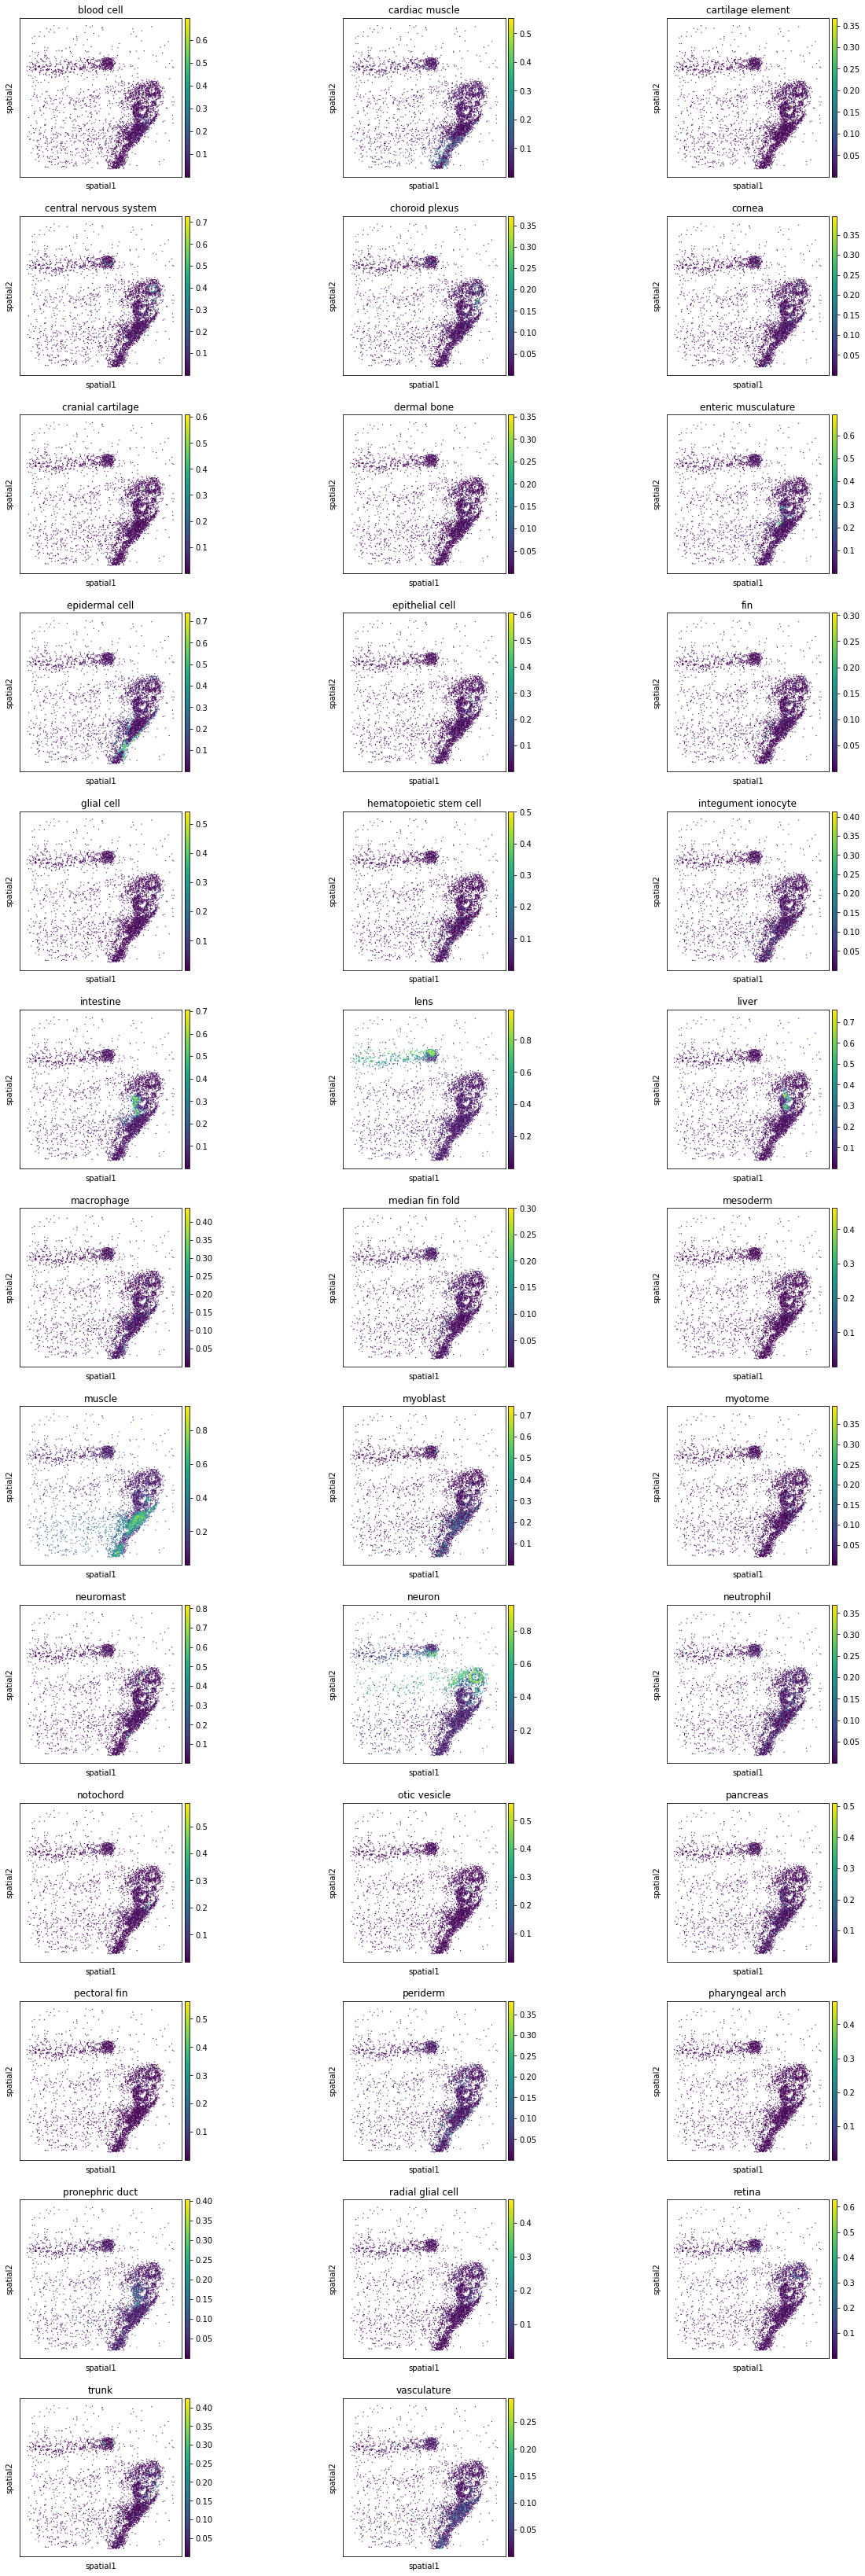

In [83]:
# generate spatial plots of expected cell-type proportions
sc.pl.spatial(adata_deconv, color=['blood cell', 'cardiac muscle', 'cartilage element',
       'central nervous system', 'choroid plexus', 'cornea',
       'cranial cartilage', 'dermal bone', 'enteric musculature',
       'epidermal cell', 'epithelial cell', 'fin', 'glial cell',
       'hematopoietic stem cell', 'integument ionocyte', 'intestine', 'lens',
       'liver', 'macrophage', 'median fin fold', 'mesoderm', 'muscle',
       'myoblast', 'myotome', 'neuromast', 'neuron', 'neutrophil', 'notochord',
       'otic vesicle', 'pancreas', 'pectoral fin', 'periderm',
       'pharyngeal arch', 'pronephric duct', 'radial glial cell', 'retina',
       'trunk', 'vasculature'],spot_size=30, ncols=3)